# TP2 - Doublons et Standardisation

**Difficulté:** Débutant  
**Dataset:** customers_duplicates.csv  
**Description:** Détection et suppression des doublons, standardisation des formats

---


## Imports des Bibliothèques


In [1]:
# Bibliothèques de base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Configuration des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Ignorer les warnings
import warnings
warnings.filterwarnings('ignore')

# Affichage pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

print(" Bibliothèques importées avec succès!")

 Bibliothèques importées avec succès!


## Import du Dataset


In [2]:
# Charger le dataset
df = pd.read_csv('customers_duplicates.csv')

# Afficher les informations de base
print(f"📏 Dimensions: {df.shape[0]} lignes × {df.shape[1]} colonnes")
print(f"Taille mémoire: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n" + "="*80 + "\n")

# Aperçu des données
display(df.head())
print("\n" + "="*80 + "\n")

# Informations sur les colonnes
df.info()

📏 Dimensions: 12 lignes × 5 colonnes
Taille mémoire: 0.00 MB




,name,email,phone,gender,country
0,Bob Dubois,ALICE.MARTIN@GMAIL.COM,+33623456789,Male,Belgique
1,alice martin,bob.dubois@yahoo.fr,+33623456789,Male,Belgique
2,Bob Dubois,bob.dubois@yahoo.fr,+33 6 12 34 56 78,Male,Belgique
3,David Bernard,david.bernard@company.com,+33645678901,F,Suisse
4,Claire Petit,claire.petit@outlook.com,+33634567890,Female,FR




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     12 non-null     object
 1   email    12 non-null     object
 2   phone    12 non-null     object
 3   gender   12 non-null     object
 4   country  12 non-null     object
dtypes: object(5)
memory usage: 612.0+ bytes


## Visualisation des Valeurs Manquantes


<Figure size 1400x800 with 0 Axes>

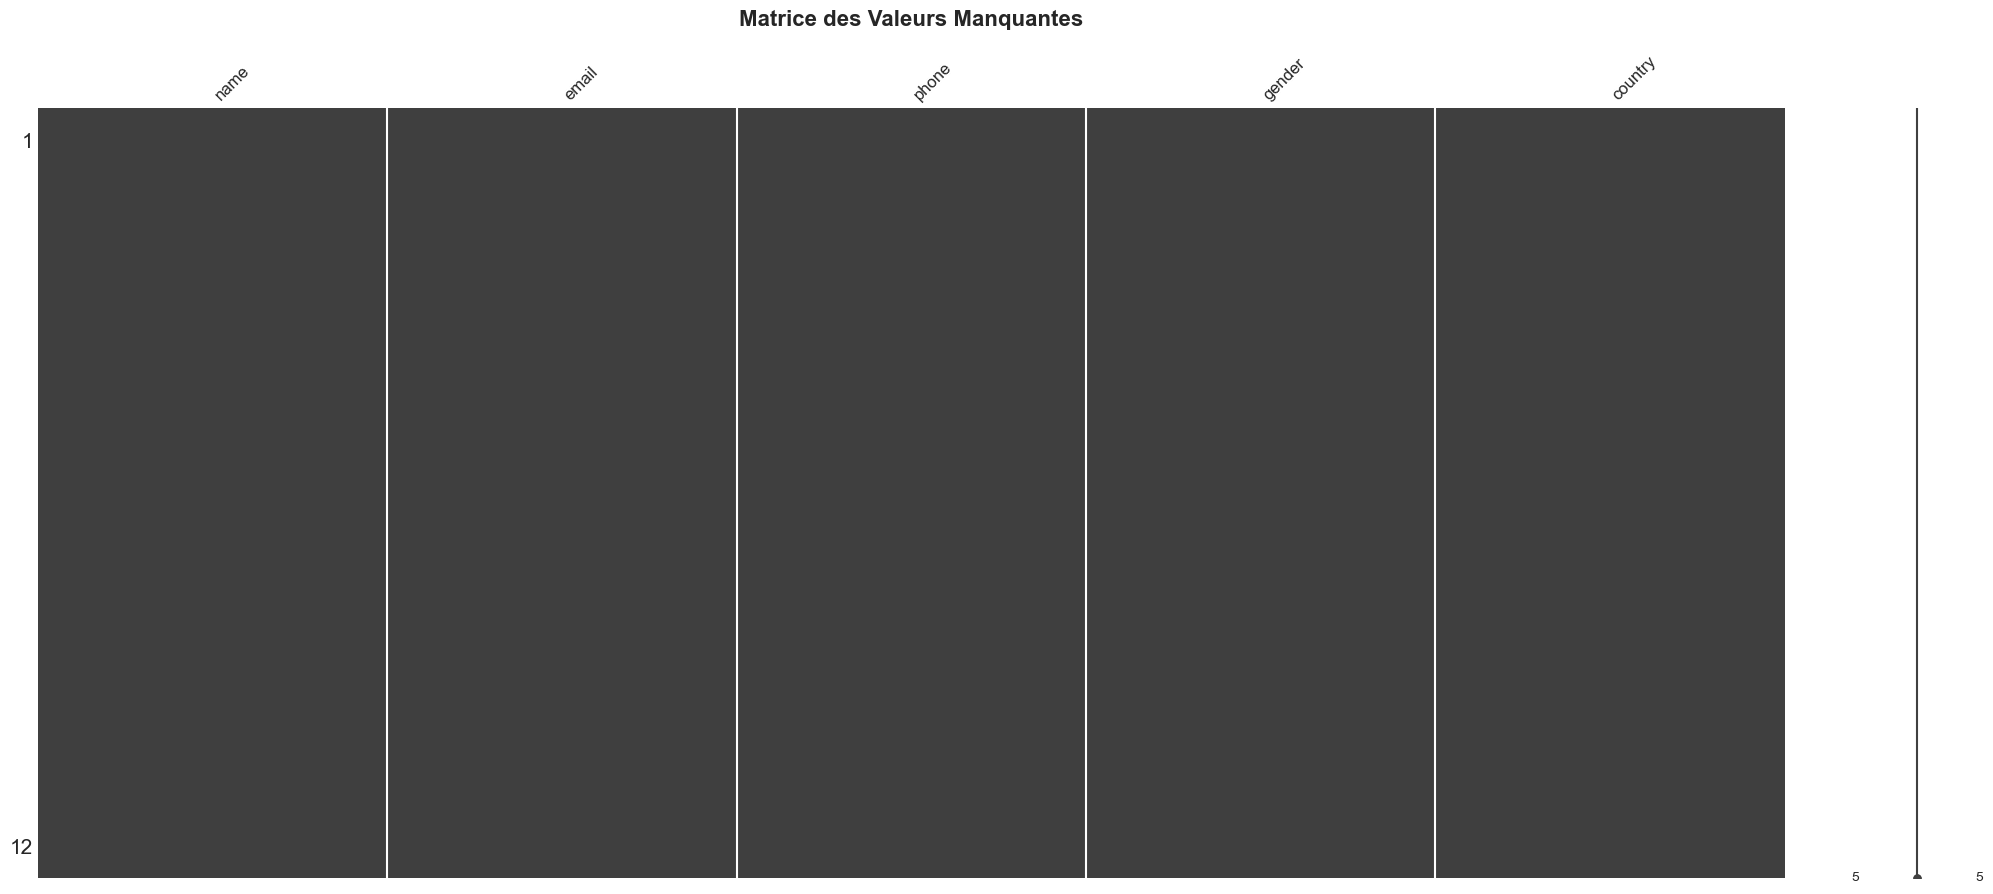


 Statistiques des Valeurs Manquantes:



,Nombre_Missing,Pourcentage_Missing


In [3]:
# Matrice de visualisation des valeurs manquantes
plt.figure(figsize=(14, 8))
msno.matrix(df, fontsize=12, sparkline=True)
plt.title("Matrice des Valeurs Manquantes", fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Statistiques des valeurs manquantes
missing_stats = pd.DataFrame({
    'Nombre_Missing': df.isnull().sum(),
    'Pourcentage_Missing': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Pourcentage_Missing', ascending=False)

print("\n Statistiques des Valeurs Manquantes:\n")
display(missing_stats[missing_stats['Nombre_Missing'] > 0])


In [6]:
duplicates_count = df.duplicated().sum()
print(f"1: {duplicates_count}")

1: 4


In [11]:
df.columns

Index(['name', 'email', 'phone', 'gender', 'country'], dtype='object')

In [12]:
print(f"2: 'gender','name'") #supposition 

2: 'gender','name'


In [14]:
if 'gender' in df.columns: 
    print(f"3: {df['gender'].unique()}")

3: ['Male' 'F' 'Female']


In [15]:
if 'phone' in df.columns: 
    phone_format = df['phone'].apply(lambda x: len(str(x)) 
                                     if pd.notna(x) 
                                     else 0).nunique()
    print(f"4: {phone_format}")

4: 2


In [20]:
if 'email' in df.columns:
    police_case = df['email'].dropna().apply(lambda x: x != x.lower()).sum()
    print(f"5: {police_case}")

5: 1


In [25]:
text_space = df.select_dtypes(include = ['object']).columns
space_in = False 

for col in text_space: 
    if df[col].dropna().apply(lambda x: x != x.strip()).any(): 
        print(f"6: {col}")
        space_in = True 
if not space_in: 
    print(f"6: pas de space")

6: pas de space


In [24]:
client_unique = df.shape[0] - duplicates_count
print(f"7: {client_unique}")

7: 8


In [26]:
if 'gender' in df.columns: 
    most_frequent = df['gender'].mode()[0]
    print(f"8: {most_frequent}")

8: Female


In [28]:
if 'name' in df.columns and 'email' in df.columns:
    partial_duplicate = df.groupby('name')['email'].nunique()
    partial_duplicate = (partial_duplicate >1).sum()
    print(f"9: {partial_duplicate}")

9: 1


In [29]:
duplicate_perc = (duplicates_count / len(df)) * 100
print(f"10: {duplicate_perc:.2f}%")

10: 33.33%


## Questions Préalables

**Avant de commencer le TP, répondez aux questions suivantes en analysant le dataset:**

1. Combien de doublons exacts le dataset contient-il ?
2. Quelles colonnes peuvent servir de clés pour identifier les doublons ?
3. Y a-t-il des variations d'écriture dans les catégories (ex: 'M'/'Male') ?
4. Combien de formats de téléphone différents sont présents ?
5. Les emails sont-ils tous en minuscules ?
6. Y a-t-il des espaces en début ou fin de chaînes ?
7. Combien de clients uniques après déduplication ?
8. Quelle est la variation la plus fréquente du genre ?
9. Y a-t-il des doublons partiels (même nom mais email différent) ?
10. Quel pourcentage du dataset est constitué de doublons ?


In [31]:
# Cellule pour vos réponses et analyses
# Utilisez cette cellule pour explorer les données et répondre aux questions

print("""Réponses aux questions:
1. 4
2. 'gender','name'
3. ['Male' 'F' 'Female']
4. 2
5. 1
6. pas de space
7. 8
8. Female
9. 1
10. 33.33%
""")
print("="*50)

# Écrivez vos réponses ici


Réponses aux questions:
1. 4
2. 'gender','name'
3. ['Male' 'F' 'Female']
4. 2
5. 1
6. pas de space
7. 8
8. Female
9. 1
10. 33.33%



## Étapes du TP

**Suivez les étapes ci-dessous pour nettoyer le dataset:**

### Étape 1: Identifier et compter les doublons exacts
### Étape 2: Afficher quelques exemples de doublons
### Étape 3: Supprimer les doublons exacts en gardant la première occurrence
### Étape 4: Standardiser la casse (emails en minuscules, noms en title case)
### Étape 5: Supprimer les espaces en début/fin de toutes les colonnes texte
### Étape 6: Créer un mapping pour standardiser les catégories (genre, pays)
### Étape 7: Appliquer le mapping aux colonnes concernées
### Étape 8: Standardiser les formats de téléphone
### Étape 9: Vérifier les doublons restants après standardisation
### Étape 10: Créer un rapport de nettoyage avec les statistiques


In [36]:
# ========================================
# Étape 1: Identifier et compter les doublons exacts
# ========================================

In [33]:
duplicates_count = df.duplicated().sum()

In [35]:
# Vérification
print(f"{duplicates_count}")
print(f" Étape 1 complétée")

4
 Étape 1 complétée


In [38]:
# ========================================
# Étape 2: Afficher quelques exemples de doublons
# ========================================

In [39]:
duplicated_rows = df[df.duplicated(keep = False)]

In [61]:
# Vérification
print(f"Total lignes en double: {len(duplicated_rows)}")
print(duplicated_rows.head(5))
print(f" Étape 2 complétée")

Total lignes en double: 7
            name                      email         phone  gender country
5   Alice Martin     alice.martin@gmail.com  +33612345678  Female  France
6  David Bernard  david.bernard@company.com  +33645678901    Male  Suisse
7  David Bernard  david.bernard@company.com  +33645678901    Male  Suisse
8   Claire Petit   claire.petit@outlook.com  +33634567890  Female  France
9   Claire Petit   claire.petit@outlook.com  +33634567890  Female  France
 Étape 2 complétée


In [ ]:
# ========================================
# Étape 3: Supprimer les doublons exacts en gardant la première occurrence
# ========================================

In [45]:
initial_shape = df.shape
print(f"la compo initiale est {initial_shape}")

la compo initiale est (12, 5)


In [47]:
df_cleaned = df.drop_duplicates(keep = 'first')

In [49]:
new_shape = df_cleaned.shape
print(f"la nouvelel compo est {new_shape}")

la nouvelel compo est (8, 5)


In [50]:
# Vérification
print(f"lignes supprimées: {initial_shape[0] - new_shape[0]}") 
print(f" Étape 3 complétée")

lignes supprimées: 4
 Étape 3 complétée


In [44]:
# ========================================
# Étape 4: Standardiser la casse (emails en minuscules, noms en title case)
# ========================================

In [51]:
if 'email' in df_cleaned.columns: 
    df_cleaned['email'] = df_cleaned['email'].str.lower()
    print("emails sont en minuscules mtn")

emails sont en minuscules mtn


In [54]:
text_cols = ['name', 'first_name', 'last_name', 'city', 'country']
for col in text_cols: 
    if col in df_cleaned.columns:
        df_cleaned[col] = df_cleaned[col].str.title()        

In [56]:
# Vérification
print(f"'{col}' converti en title case")
print(f" Étape 4 complétée")

'country' converti en title case
 Étape 4 complétée


In [57]:
# ========================================
# Étape 5: Supprimer les espaces en début/fin de toutes les colonnes texte
# ========================================

In [59]:
text_cols = df_cleaned.select_dtypes(include = ['object']).columns

for col in text_cols: 
    df_cleaned[col] = df_cleaned[col].str.strip()

In [60]:
# Vérification
print(f" Étape 5 complétée")

 Étape 5 complétée


In [62]:
# ========================================
# Étape 6: Créer un mapping pour standardiser les catégories (genre, pays)
# ========================================

In [63]:
gender_mapping = {
    'M': 'Male', 'm': 'Male', 'Male': 'Male', 'male': 'Male',
    'F': 'Female', 'f': 'Female', 'Female': 'Female', 'female': 'Female'
}

In [64]:
country_mapping = {
    'FR': 'France', 'France': 'France', 'france': 'France',
    'UK': 'United Kingdom', 'GB': 'United Kingdom', 
    'US': 'USA', 'USA': 'USA', 'usa': 'USA', 'United States': 'USA'    
}

In [67]:
# Vérification
print(f" gender cat: {len(gender_mapping)}")
print(f" country cat: {len(country_mapping)}")
print(f" Étape 6 complétée")

 gender cat: 8
 country cat: 9
 Étape 6 complétée


In [68]:
# ========================================
# Étape 7: Appliquer le mapping aux colonnes concernées
# ========================================

In [69]:
if 'gender' in df_cleaned.columns: 
    df_cleaned['gender'] = df_cleaned['gender'].map(gender_mapping).fillna(df_cleaned['gender'])
    print(f"gender standardisé {df_cleaned['gender'].unique()}")

gender standardisé ['Male' 'Female']


In [70]:
if 'country' in df_cleaned.columns: 
    df_cleaned['country'] = df_cleaned['country'].map(gender_mapping).fillna(df_cleaned['country'])
    print(f"gender standardisé {df_cleaned['country'].unique()}")

gender standardisé ['Belgique' 'Suisse' 'Fr' 'France']


In [72]:
# Vérification
print(f" Étape 7 complétée")

 Étape 7 complétée


In [73]:
# ========================================
# Étape 8: Standardiser les formats de téléphone
# ========================================

In [74]:
import re 

def clean_phone(phone): 
    if pd.isna(phone):
        return phone 

    cleaned = re.sub(r'\D', '', str(phone))

    if len(cleaned) >= 10: 
        return f"+{cleaned[:2]} {cleaned[2:5]} {cleaned[5:8]} {cleaned[8:]}"
    return phone 

if 'phone' in df_cleaned.columns:
    df_cleaned['phone'] = df_cleaned['phone'].apply(clean_phone)
    print("téls standardisés")
   

téls standardisés


In [75]:
# Vérification
print(df_cleaned['phone'].head())
print(f" Étape 8 complétée")

0    +33 623 456 789
1    +33 623 456 789
2    +33 612 345 678
3    +33 645 678 901
4    +33 634 567 890
Name: phone, dtype: object
 Étape 8 complétée


In [76]:
# ========================================
# Étape 9: Vérifier les doublons restants après standardisation
# ========================================

In [77]:
remaining_duplicata = df_cleaned.duplicated().sum()
print(f"il reste {remaining_duplicata} doublons")

il reste 0 doublons


In [78]:
if remaining_duplicata > 0: 
    print(df_cleaned[df_cleaned.duplicated(keep = False)].head())
else: 
    print("plus de doublons à traiter")

plus de doublons à traiter


In [79]:
# Vérification
print(f" Étape 9 complétée")

 Étape 9 complétée


In [80]:
# ========================================
# Étape 10: Créer un rapport de nettoyage avec les statistiques
# ========================================

In [85]:
dimension_avant = df.shape[0]
dimension_apres = df_cleaned.shape[0]
print(dimension_avant)
print(dimension_apres)

12
8


In [87]:
print(f"Lignes avant:        {dimension_avant}")
print(f"Lignes après:        {dimension_apres}")
print(f"Doublons supprimés:  {dimension_avant - dimension_apres}")
print(f"Taux compression:    {((dimension_avant - dimension_apres) / dimension_avant * 100):.2f}%")

Lignes avant:        12
Lignes après:        8
Doublons supprimés:  4
Taux compression:    33.33%


In [88]:
# Vérification
print(f" Étape 10 complétée")

 Étape 10 complétée


## Rapport Final

**Créez un rapport résumant toutes les transformations effectuées**


In [90]:
# Rapport de nettoyage
rapport = {
    'Dimensions_initiales': df.shape,
    'Dimensions_finales': df_cleaned.shape, 
    'Lignes_supprimées': df.shape[0] - df_cleaned.shape[0],
    'Colonnes_supprimées': 0,
    'Valeurs_manquantes_traitées': 0,
    'Doublons_supprimés': df.shape[0] - df_cleaned.shape[0],
    'Outliers_traités': 0,
    'Transformations_appliquées': [
        'Suppression doublons exacts',
        'Standardisation casse (emails, noms)',
        'Suppression espaces',
        'Mapping catégories',
        'Standardisation téléphones']
}

print("=" * 50)
print(" " * 25 + " RAPPORT DE NETTOYAGE")
print("=" * 50)

for key, value in rapport.items():
    print(f"{key:.<40} {value}")

print("=" * 50)
print("\n TP terminé avec succès!")

                          RAPPORT DE NETTOYAGE
Dimensions_initiales.................... (12, 5)
Dimensions_finales...................... (8, 5)
Lignes_supprimées....................... 4
Colonnes_supprimées..................... 0
Valeurs_manquantes_traitées............. 0
Doublons_supprimés...................... 4
Outliers_traités........................ 0
Transformations_appliquées.............. ['Suppression doublons exacts', 'Standardisation casse (emails, noms)', 'Suppression espaces', 'Mapping catégories', 'Standardisation téléphones']

 TP terminé avec succès!
